Loaded 3000 images of size (128, 128, 3).


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.3115 - loss: 18.3454 - val_accuracy: 0.3104 - val_loss: 1.6062
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.3249 - loss: 1.7227 - val_accuracy: 0.2917 - val_loss: 1.1119
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.3360 - loss: 1.1011 - val_accuracy: 0.3458 - val_loss: 1.0990
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.3457 - loss: 1.0933 - val_accuracy: 0.3458 - val_loss: 1.0982
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.3344 - loss: 1.0968 - val_accuracy: 0.3417 - val_loss: 1.0986
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.3307 - loss: 1.0947 - val_accuracy: 0.3417 - val_loss: 1.0983
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.3321 - loss: 1.0986 - val_accuracy: 0.3417 - val_loss: 1.0983
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.3320 - loss: 1.0952 - val_acc

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

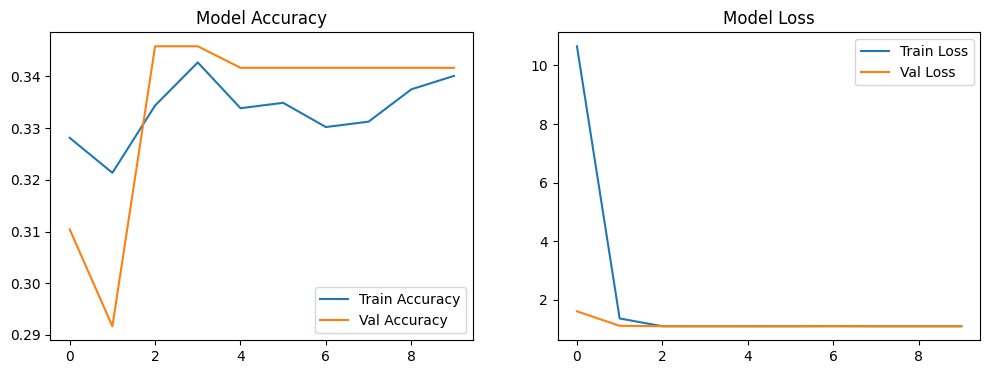

In [11]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Function to load images and their labels from the dataset folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))  # ensure consistent order
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img = load_img(os.path.join(class_path, filename), target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels), class_names

# Load the dataset
dataset_path = "image_dataset/Animals"
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images of size {X.shape[1:]}.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the image data to feed into the DNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the DNN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions and evaluate the model
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

plot_history(history)

